In [58]:
import numpy as np
from matplotlib_venn import venn2, venn3

14411


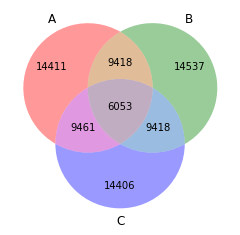

In [59]:
def venn_diagram(a, b, c, labels=['A', 'B', 'C']):

    a = set(a)
    b = set(b)
    c = set(c)

    only_a = len(a - b - c)
    only_b = len(b - a - c)
    only_c = len(c - a - b)

    print(only_a)

    only_a_b = len(a & b - c)
    only_a_c = len(a & c - b)
    only_b_c = len(b & c - a)

    a_b_c = len(a & b & c)

    venn3(subsets=(only_a, only_b, only_a_b, only_c, only_a_c, only_b_c, a_b_c), set_labels=labels)

a, b, c = np.round(np.random.rand(3, 50000), 5)
venn_diagram(a, b, c)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [3]:
df_teams = pd.read_excel("data/Teams.xlsx")
df_atheletes = pd.read_excel("data/Athletes.xlsx")
df_medals = pd.read_excel("data/Medals.xlsx")
df_entries = pd.read_excel("data/EntriesGender.xlsx")
print(df_teams.info())
print(df_atheletes.info())
print(df_medals.info())
print(df_entries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           93 non-null     int64  
 1   Team/NOC       9

In [19]:
disciplines_india = set(df_teams[df_teams['NOC'] == 'India']['Discipline'].values.tolist())
disciplines_india

{'Archery', 'Athletics', 'Hockey', 'Table Tennis'}

In [65]:
disciplines = set(df_entries['Discipline'].value_counts().index.tolist())
print(len(disciplines), disciplines)

46 {'Artistic Swimming', 'Modern Pentathlon', 'Beach Volleyball', 'Handball', 'Rowing', 'Volleyball', 'Badminton', 'Judo', 'Boxing', 'Football', 'Canoe Slalom', 'Weightlifting', 'Marathon Swimming', 'Diving', 'Swimming', 'Karate', 'Archery', 'Cycling Track', 'Sailing', 'Shooting', '3x3 Basketball', 'Rugby Sevens', 'Tennis', 'Triathlon', 'Taekwondo', 'Wrestling', 'Canoe Sprint', 'Baseball/Softball', 'Basketball', 'Cycling BMX Freestyle', 'Equestrian', 'Fencing', 'Hockey', 'Golf', 'Artistic Gymnastics', 'Cycling Road', 'Cycling BMX Racing', 'Table Tennis', 'Skateboarding', 'Water Polo', 'Rhythmic Gymnastics', 'Trampoline Gymnastics', 'Sport Climbing', 'Cycling Mountain Bike', 'Athletics', 'Surfing'}


In [34]:
len(disciplines & disciplines_india), (disciplines & disciplines_india)

(4, {'Archery', 'Athletics', 'Hockey', 'Table Tennis'})

In [66]:
print(len(disciplines - disciplines_india), disciplines - disciplines_india)

42 {'Artistic Swimming', 'Modern Pentathlon', 'Beach Volleyball', 'Handball', 'Rowing', 'Volleyball', 'Badminton', 'Judo', 'Boxing', 'Football', 'Canoe Slalom', 'Weightlifting', 'Marathon Swimming', 'Diving', 'Swimming', 'Karate', 'Cycling Track', 'Sailing', 'Shooting', '3x3 Basketball', 'Rugby Sevens', 'Tennis', 'Triathlon', 'Taekwondo', 'Wrestling', 'Canoe Sprint', 'Baseball/Softball', 'Basketball', 'Cycling BMX Freestyle', 'Equestrian', 'Fencing', 'Golf', 'Artistic Gymnastics', 'Cycling Road', 'Cycling BMX Racing', 'Skateboarding', 'Water Polo', 'Rhythmic Gymnastics', 'Trampoline Gymnastics', 'Sport Climbing', 'Cycling Mountain Bike', 'Surfing'}


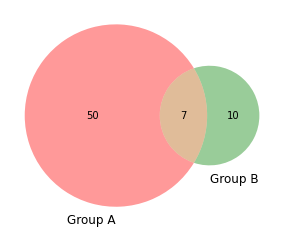

In [60]:
venn2(subsets = (50, 10, 7), set_labels = ('Group A', 'Group B'))#, set_colors=("orange","blue"),alpha=0.7)

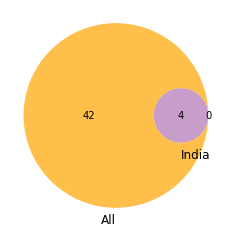

In [64]:
venn2(  subsets=(len(disciplines-disciplines_india), len(disciplines_india-disciplines), len(disciplines & disciplines_india)), 
        set_labels=('All', 'India'), set_colors=("orange","blue"),alpha=0.7)

plt.show()

In [70]:
df_medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Unnamed: 7,Unnamed: 8
0,1,United States of America,39,41,33,113,1,NaN,NaN
1,2,People's Republic of China,38,32,18,88,2,NaN,NaN
2,3,Japan,27,14,17,58,5,NaN,NaN
3,4,Great Britain,22,21,22,65,4,NaN,NaN
4,5,ROC,20,28,23,71,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,NaN,NaN
89,86,Grenada,0,0,1,1,77,NaN,NaN
90,86,Kuwait,0,0,1,1,77,NaN,NaN
91,86,Republic of Moldova,0,0,1,1,77,NaN,NaN


In [86]:
medals_india = df_medals[df_medals['Team/NOC']=='India']['Total'].sum()
medals_all = df_medals['Total'].sum()
print(medals_india, medals_all)

7 1080


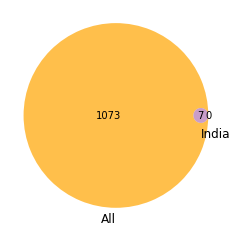

In [87]:
venn2(  subsets=(medals_all-medals_india, 0, medals_india), 
        set_labels=('All', 'India'), set_colors=("orange","blue"),alpha=0.7)

plt.show()

In [107]:
noc_total = df_teams['NOC'].unique().tolist()
print(noc_total)

['Belgium', "People's Republic of China", 'France', 'Italy', 'Japan', 'Latvia', 'Mongolia', 'Netherlands', 'Poland', 'ROC', 'Romania', 'Serbia', 'United States of America', 'Australia', 'Bangladesh', 'Belarus', 'Brazil', 'Canada', 'Chinese Taipei', 'Colombia', 'Egypt', 'Germany', 'Great Britain', 'India', 'Indonesia', 'Kazakhstan', 'Malaysia', 'Mexico', 'Republic of Moldova', 'Republic of Korea', 'Spain', 'Tunisia', 'Turkey', 'Ukraine', 'Vietnam', 'Switzerland', 'Austria', 'Greece', 'Israel', 'Liechtenstein', 'South Africa', 'Bahamas', 'Botswana', 'Cuba', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Ghana', 'Ireland', 'Jamaica', 'Nigeria', 'Trinidad and Tobago', 'Argentina', 'Islamic Republic of Iran', 'Puerto Rico', 'Slovenia', 'Chile', 'Kenya', 'Morocco', 'Norway', 'Qatar', 'Hong Kong, China', 'Lithuania', 'New Zealand', 'Estonia', 'Hungary', "Côte d'Ivoire", 'Honduras', 'Saudi Arabia', 'Sweden', 'Zambia', 'Angola', 'Bahrain', 'Montenegro', 'Portugal', 'Azerbaijan',

In [108]:
teams_total = df_teams['Name'].unique().tolist()
print(teams_total)

['Belgium', 'China', 'France', 'Italy', 'Japan', 'Latvia', 'Mongolia', 'Netherlands', 'Poland', 'ROC', 'Romania', 'Serbia', 'United States', 'Australia', 'Bangladesh', 'Belarus', 'Brazil', 'Canada', 'Chinese Taipei', 'Colombia', 'Egypt', 'Germany', 'Great Britain', 'India', 'Indonesia', 'Kazakhstan', 'Malaysia', 'Mexico', 'Rep. of Moldova', 'Republic of Korea', 'Spain', 'Tunisia', 'Turkey', 'Ukraine', 'Vietnam', 'Korea', 'Switzerland', 'Austria', 'Greece', 'Israel', 'Liechtenstein', 'South Africa', 'Bahamas', 'Botswana', 'Cuba', 'Czech Republic', 'Denmark', 'Dominican Rep.', 'Ecuador', 'Ghana', 'Ireland', 'Jamaica', 'Nigeria', 'Trinidad & Tobago', 'Argentina', 'Islamic Rep. of Iran', 'Puerto Rico', 'Slovenia', 'Azaad/Capogrosso', 'Gallay/Pereyra', 'McHugh/Schumann', 'Artacho Del Solar/Clancy', 'Alison/Alvaro Filho', 'Evandro/Bruno Schmidt', 'Ana Patricia/Rebecca', 'Agatha/Duda', 'Bansley/Brandie', 'Pavan/Melissa', 'Grimalt M./Grimalt E.', 'Wang/X.Y.Xia', 'Xue/Wang X.X.', 'Lidy/Leila', 

In [111]:
print(set(teams_total)- set(noc_total))

{'Evandro/Bruno Schmidt', 'XU Xin / LIU Shiwen', 'Menegatti/Orsi Toth', 'Stam/Schoon', 'Brouwer/Meeuwsen', 'Krasilnikov/Stoyanovskiy', 'Cherif/Ahmed', 'ACHANTA Kamal / BATRA Manika', 'Xue/Wang X.X.', 'Abicha/Elgraoui', 'McHugh/Schumann', 'Thole J./Wickler', 'Gallay/Pereyra', 'Alison/Alvaro Filho', 'Kantor/Losiak', 'Trinidad & Tobago', 'Mol A./Sorum C.', 'Huberli/Betschart', 'ASSAR Omar / MESHREF Dina', 'Grimalt M./Grimalt E.', 'IONESCU Ovidiu / SZOCS Bernadette', 'Leshukov/Semenov', 'WANG Zhen / ZHANG Mo', 'Keizer/Meppelink', 'Artacho Del Solar/Clancy', 'FEGERL Stefan / POLCANOVA Sofia', 'Ishii/Murakami', 'Côte d’Ivoire', 'PISTEJ Lubomir / BALAZOVA Barbora', 'China', 'Rep. of Moldova', 'Hermannova/Slukova', 'CAMPOS Jorge / FONSECA Daniela', 'Korea', 'LIN Yun Ju / CHENG I Ching', 'Makroguzova/Kholomina', 'Gibb/Bourne', 'LEE Sangsu / JEON Jihee', 'Ana Patricia/Rebecca', 'Graudina/Kravcenoka', 'Ludwig/Kozuch', 'Lidy/Leila', 'April/Alix', 'Carambula/Rossi', 'Bryl/Fijalek', 'Gottsu/Shirator

In [103]:
teams_total = df_teams['NOC'].unique().tolist()#.shape[0]
teams_with_medals = df_medals['Team/NOC'].unique().tolist()#.shape[0]
print(set(teams_total) - set(teams_with_medals))
print(set(teams_with_medals) - set(teams_total))

{'Chile', 'Honduras', 'Montenegro', 'Vietnam', 'Singapore', 'Angola', 'Bangladesh', 'Trinidad and Tobago', 'Zambia', 'Liechtenstein'}
{'Philippines', 'Syrian Arab Republic', 'Ethiopia', 'Bermuda', 'Kyrgyzstan', 'Kosovo', 'Thailand', 'Burkina Faso', 'San Marino', 'Grenada', 'Uganda', 'Turkmenistan', 'Georgia', 'Jordan', 'Finland', 'Kuwait', 'Namibia', 'Armenia', 'North Macedonia'}


In [114]:
df_medals['Total'].sum(), df_medals['Gold'].sum(), df_medals['Silver'].sum(), df_medals['Bronze'].sum()

(1080, 340, 338, 402)

In [123]:
teams_with_medals = df_medals['Team/NOC'].unique().tolist()#.shape[0]
print(teams_with_medals)

['United States of America', "People's Republic of China", 'Japan', 'Great Britain', 'ROC', 'Australia', 'Netherlands', 'France', 'Germany', 'Italy', 'Canada', 'Brazil', 'New Zealand', 'Cuba', 'Hungary', 'Republic of Korea', 'Poland', 'Czech Republic', 'Kenya', 'Norway', 'Jamaica', 'Spain', 'Sweden', 'Switzerland', 'Denmark', 'Croatia', 'Islamic Republic of Iran', 'Serbia', 'Belgium', 'Bulgaria', 'Slovenia', 'Uzbekistan', 'Georgia', 'Chinese Taipei', 'Turkey', 'Greece', 'Uganda', 'Ecuador', 'Ireland', 'Israel', 'Qatar', 'Bahamas', 'Kosovo', 'Ukraine', 'Belarus', 'Romania', 'Venezuela', 'India', 'Hong Kong, China', 'Philippines', 'Slovakia', 'South Africa', 'Austria', 'Egypt', 'Indonesia', 'Ethiopia', 'Portugal', 'Tunisia', 'Estonia', 'Fiji', 'Latvia', 'Thailand', 'Bermuda', 'Morocco', 'Puerto Rico', 'Colombia', 'Azerbaijan', 'Dominican Republic', 'Armenia', 'Kyrgyzstan', 'Mongolia', 'Argentina', 'San Marino', 'Jordan', 'Malaysia', 'Nigeria', 'Bahrain', 'Saudi Arabia', 'Lithuania', 'Nor

In [124]:
venn3(  subsets=(medals_all-medals_india, 0, medals_india, len(disciplines-disciplines_india), 0, len(disciplines_india)), 
        set_labels=('Medals', 'Disciplines', 'India'), set_colors=("orange","blue","green"),alpha=0.7)

plt.show()

TypeError: Cannot broadcast np.ndarray with operand of type <class 'method'>